In [86]:
import pandas as pd
from sklearn import cluster, preprocessing
from sklearn.decomposition import PCA
import pylab as pl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tabulate import tabulate

In [35]:
"""
too lazy to check for xlxs
PLease convert the XLSX to csv and use this code
"""
survey_raw_df = pd.read_csv('/Users/agowda/Downloads/Hospital Data.csv')

/Users/agowda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,66,73,185,223) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
"""
To check amount of NA values in any given column
-----
Usage
-----

count_na_in_col('URL')

"""
def count_na_in_col(colname):
    return(sum(pd.isnull(survey_raw_df[colname])))

In [50]:
# Example:
    
count_na_in_col('RNSCH')
count_na_in_col('GPOST')
count_na_in_col('SUPLY')
count_na_in_col('SUPNM')
count_na_in_col('CBSATYPE')
count_na_in_col('MAPP18')

0

In [72]:
"""
Add your variables here
"""
bed_df = survey_raw_df[['PLNTA'
                        ,'ADEPRA'
                        ,'ASSNET'
                        ,'GFEET'
                        ,'CEAMT']]
bed_df = bed_df.fillna(bed_df.mean())
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(bed_df)
bed_df_normalized = pd.DataFrame(np_scaled, columns=bed_df.columns)


In [59]:
bed_df = survey_raw_df[['RNSCH'
                        ,'PLNTA'
                        ,'ADEPRA'
                        ,'ASSNET'
                        ,'GFEET'
                        ,'CEAMT']]

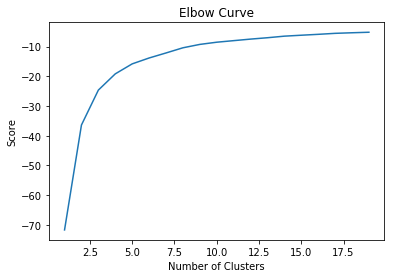

In [83]:
Nc = range(1, 20)
kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(bed_df_normalized).score(bed_df_normalized) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [93]:
def plot_pca_2d(clusterObj):
    pca = PCA(n_components=2).fit(bed_df_normalized)
    pca_2d = pca.transform(bed_df_normalized)
    pl.figure('K_means with{n}'.format(n=number_of_cluster))
    pl.scatter(pca_2d[:, 0], pca_2d[:, 1],c=clusterObj.labels_)
    pl.xlabel("PCA_1")
    pl.ylabel("PCA_2")
    pl.show()
    pca_table = pd.DataFrame(pca.components_,columns=bed_df_normalized.columns,index = ['PC-1','PC-2'])
    print(tabulate(pca_table, headers='keys', tablefmt='psql'))

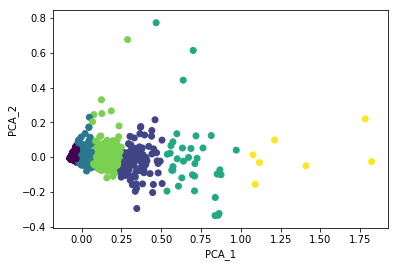

+------+-----------+-----------+-----------+----------+-----------+
|      |     PLNTA |    ADEPRA |    ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+-----------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187 | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394 | 0.864883 | -0.238227 |
+------+-----------+-----------+-----------+----------+-----------+


In [94]:
number_of_cluster = 6

kmeans= cluster.KMeans(n_clusters=number_of_cluster)
kmeans.fit(bed_df_normalized)
plot_pca_2d(kmeans)

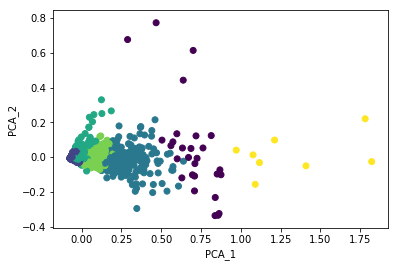

         PLNTA    ADEPRA    ASSNET     GFEET     CEAMT
PC-1  0.520333  0.529218  0.490187  0.441623  0.117760
PC-2 -0.240265 -0.102378 -0.356394  0.864883 -0.238227


In [76]:
agglometrativeObj = cluster.AgglomerativeClustering(n_clusters=6).fit(bed_df_normalized)
plot_pca_2d(agglometrativeObj)

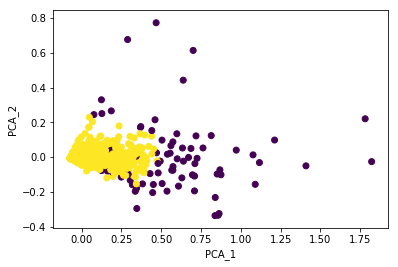

         PLNTA    ADEPRA    ASSNET     GFEET     CEAMT
PC-1  0.520333  0.529218  0.490187  0.441623  0.117760
PC-2 -0.240265 -0.102378 -0.356394  0.864883 -0.238227


In [77]:
dbscanObj = cluster.DBSCAN(eps=0.1,min_samples=20).fit(bed_df_normalized)

plot_pca_2d(dbscanObj)

In [78]:
# 3 Dimensional PCA variables
"""
Change composition of bed_df
bed_df = survey_raw_df[['GENBD','PEDBD','OBBD','ACULTBD']]
bed_df = bed_df.fillna(bed_df.mean())

"""
def plot_3d_cluster(clusterObj):
    pca_3 = PCA(n_components=3).fit(bed_df_normalized)
    pca_3d = pca_3.transform(bed_df_normalized)
    angle_1 = plt.figure()
    ax = angle_1.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 0], pca_3d[:, 1],pca_3d[:,2], c=kmeans.labels_, marker='o')
    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_zlabel('PC-3')

    angle_2 = plt.figure()
    ax = angle_2.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 1], pca_3d[:, 2],pca_3d[:,0], c=kmeans.labels_, marker='o')
    ax.set_xlabel('PC-2')
    ax.set_ylabel('PC-3')
    ax.set_zlabel('PC-1')

    angle_3 = plt.figure()
    ax = angle_3.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 2], pca_3d[:, 0],pca_3d[:,1], c=kmeans.labels_, marker='o')
    ax.set_xlabel('PC-3')
    ax.set_ylabel('PC-1')
    ax.set_zlabel('PC-2')

    plt.show()
    print(pd.DataFrame(pca_3.components_,columns=bed_df_normalized.columns,index = ['PC-1','PC-2','PC-3']))


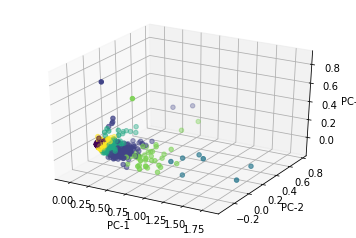

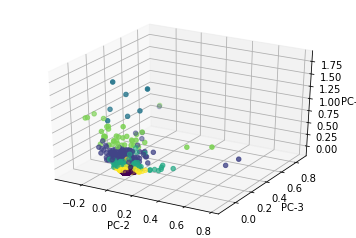

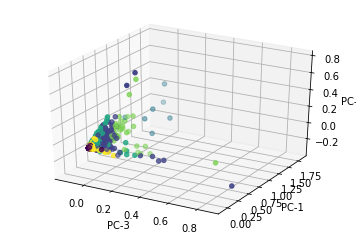

         PLNTA    ADEPRA    ASSNET     GFEET     CEAMT
PC-1  0.520333  0.529218  0.490187  0.441623  0.117760
PC-2 -0.240265 -0.102378 -0.356394  0.864883 -0.238227
PC-3 -0.121719 -0.293091  0.040388  0.203040  0.925433


In [79]:
plot_3d_cluster(agglometrativeObj)

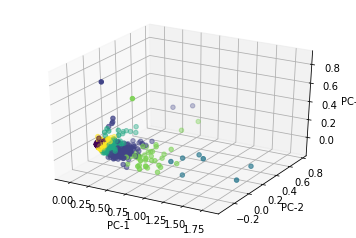

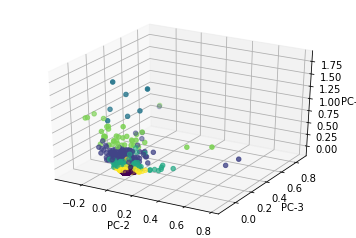

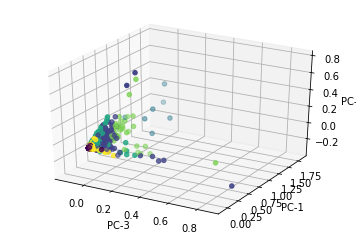

         PLNTA    ADEPRA    ASSNET     GFEET     CEAMT
PC-1  0.520333  0.529218  0.490187  0.441623  0.117760
PC-2 -0.240265 -0.102378 -0.356394  0.864883 -0.238227
PC-3 -0.121719 -0.293091  0.040388  0.203040  0.925433


In [80]:
plot_3d_cluster(dbscanObj)

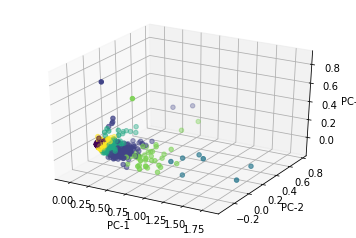

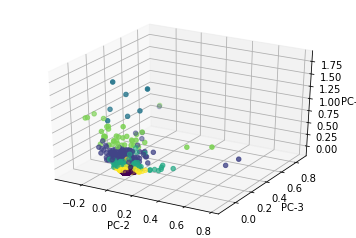

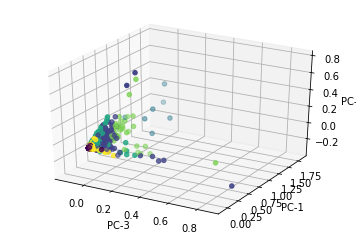

         PLNTA    ADEPRA    ASSNET     GFEET     CEAMT
PC-1  0.520333  0.529218  0.490187  0.441623  0.117760
PC-2 -0.240265 -0.102378 -0.356394  0.864883 -0.238227
PC-3 -0.121719 -0.293091  0.040388  0.203040  0.925433


In [81]:
plot_3d_cluster(kmeans)

In [70]:
pca_3.explained_variance_ratio_

NameError: name 'pca_3' is not defined

In [71]:
pca_vs_features = pd.DataFrame(pca_3.components_,columns=bed_df.columns,index = ['PC-1','PC-2','PC-3'])


NameError: name 'pca_3' is not defined

In [ ]:
pca_column = pca_vs_features.idxmax(axis=1)